In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
# --- a. Data Cleaning ---
df.replace('?', np.nan, inplace=True)
df = df.dropna()  # remove missing values
df = df[df.select_dtypes(include=[np.number]).ge(0).all(1)]  # remove negative values

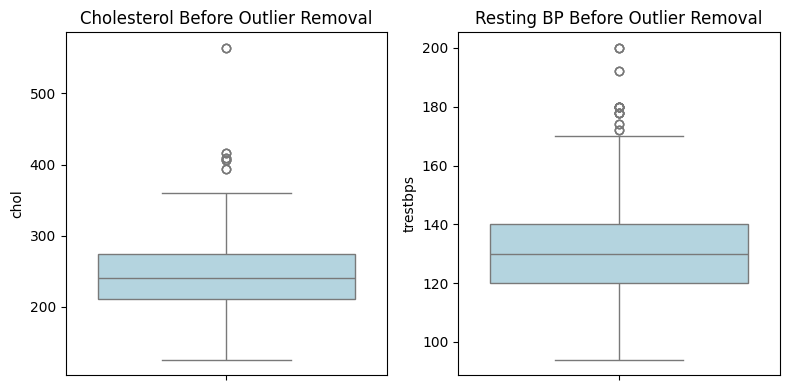

In [7]:
# --- b. Error Correcting (Outlier Detection and Removal) ---
# Plot box plots before outlier removal
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['chol'], color='lightblue')
plt.title("Cholesterol Before Outlier Removal")
plt.subplot(1, 2, 2)
sns.boxplot(y=df['trestbps'], color='lightblue')
plt.title("Resting BP Before Outlier Removal")
plt.tight_layout()
plt.show()

In [8]:
# Remove outliers using IQR for chol and trestbps
for col in ['chol', 'trestbps']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

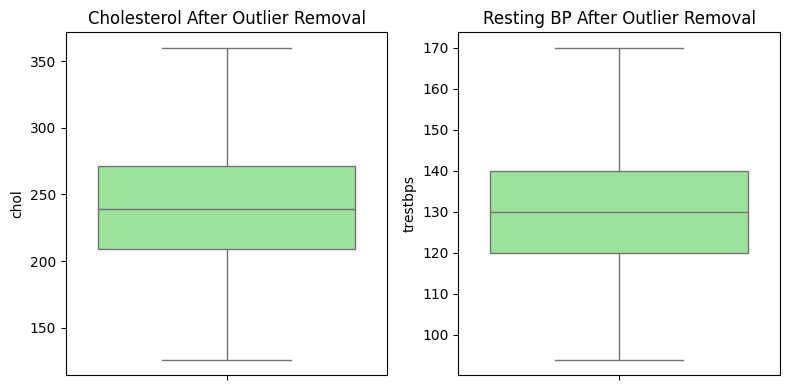

In [9]:
# Plot box plots after outlier removal
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['chol'], color='lightgreen')
plt.title("Cholesterol After Outlier Removal")
plt.subplot(1, 2, 2)
sns.boxplot(y=df['trestbps'], color='lightgreen')
plt.title("Resting BP After Outlier Removal")
plt.tight_layout()
plt.show()

In [10]:
# --- c. Data Transformation ---
X = df.drop('target', axis=1)
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# --- d. Model Building and Accuracy Comparison ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [12]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [13]:
# kNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [14]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("kNN Accuracy:", accuracy_score(y_test, knn_pred))

Logistic Regression Accuracy: 0.8469387755102041
kNN Accuracy: 0.8724489795918368
